# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [23]:
#CREATE EMPTY LIST to append API data into lists
city_weather = []

#Print log
print("Start Data Retrieval.....")
print(".........................")

#Start the call counter
record_counter = 1

#Loop to create Columns for DataFrame
#enumerate cities to correct error
for i, city in enumerate(cities):
        
        #Create url for each individual city
        query_url = url + "&q=" + city

        # Log the url & record number
        print("Processing Record # %s | %s" % (record_counter, city))

        #Add 1 to the the record after each city is logged
        record_counter += 1

        #Run an API request for each of the cities
        try:

                #Parse JSON & get data
                weather_json = requests.get(query_url).json()

                #Parse max_temp, lat, lng, humidity, cloudiness & windspeed
                max_temp = weather_json["main"]["temp_max"]
                lat = weather_json["coord"]["lat"]
                lng = weather_json["coord"]["lon"]
                humidity = weather_json["main"]["humidity"]
                cloudiness = weather_json["clouds"]["all"]
                wind_speed = weather_json["wind"]["speed"]
                country = weather_json["sys"]["country"]
                date = weather_json["dt"]

                # Append the parsed information into city_weather list
                city_weather.append({"City": city,
                            "Max Temp": max_temp, 
                            "Lat": lat, 
                            "Lng": lng, 
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": date})
        # If an error occurs, give message "City not available"
        except:
                print("City not available")
                pass

# Indicate that Data Loading is complete 
print("End Data Retrieval.....")
print(".......................")

ecord # 93 | waingapu
Processing Record # 94 | dikson
Processing Record # 95 | sentyabrskiy
City not available
Processing Record # 96 | pacific grove
Processing Record # 97 | georgetown
Processing Record # 98 | shetpe
Processing Record # 99 | oranjestad
Processing Record # 100 | nanortalik
Processing Record # 101 | ponta do sol
Processing Record # 102 | port lincoln
Processing Record # 103 | fairmont
Processing Record # 104 | ancud
Processing Record # 105 | flin flon
Processing Record # 106 | cookshire
City not available
Processing Record # 107 | leningradskiy
Processing Record # 108 | saint george
Processing Record # 109 | fortuna
Processing Record # 110 | vostok
Processing Record # 111 | port hardy
Processing Record # 112 | tasiilaq
Processing Record # 113 | hobyo
Processing Record # 114 | shingu
Processing Record # 115 | padang
Processing Record # 116 | pevek
Processing Record # 117 | jumla
Processing Record # 118 | oranjemund
Processing Record # 119 | carnarvon
Processing Record # 

In [24]:
### Convert Raw Data to DataFrame & check for number of cities found
city_weather_df =pd.DataFrame(city_weather)
city_weather_df.count()

City          574
Max Temp      574
Lat           574
Lng           574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [25]:
#Display Data Frame
city_weather_df.head()

,City,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date
0,constitucion,52.79,-35.3333,-72.4167,79,0,10.02,CL,1610591839
1,narsaq,28.40,60.9167,-46.0500,86,90,3.44,GL,1610591715
2,timra,14.00,62.4870,17.3257,79,90,13.80,SE,1610592010
3,andijon,36.00,40.7821,72.3442,74,0,7.00,UZ,1610592011
4,cayenne,78.80,4.9333,-52.3333,83,75,8.05,GF,1610591660


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#Pull descriptive statistics for each list
city_weather_df.describe()

,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,49.362456,20.489609,14.039543,74.693380,52.810105,7.333554,1.610592e+09
std,31.437157,32.541925,89.267941,19.123007,40.607221,5.470416,2.074740e+02
min,-45.960000,-54.800000,-175.200000,1.000000,0.000000,0.090000,1.610591e+09
25%,33.010000,-6.196250,-65.408825,66.000000,2.250000,3.310000,1.610592e+09
50%,58.495000,24.800000,17.213600,79.000000,64.500000,5.750000,1.610592e+09
75%,74.320000,46.661350,92.546475,88.000000,94.000000,10.360000,1.610592e+09
max,107.600000,78.218600,178.416700,100.000000,100.000000,35.680000,1.610592e+09


In [27]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_one_hundred = city_weather_df[(city_weather_df["Humidity"] > 100)].index
humidity_over_one_hundred

Int64Index([], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humidity_under_one_hundred = city_weather_df.drop(humidity_over_one_hundred, inplace=False)
humidity_under_one_hundred.head()

,City,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date
0,constitucion,52.79,-35.3333,-72.4167,79,0,10.02,CL,1610591839
1,narsaq,28.40,60.9167,-46.0500,86,90,3.44,GL,1610591715
2,timra,14.00,62.4870,17.3257,79,90,13.80,SE,1610592010
3,andijon,36.00,40.7821,72.3442,74,0,7.00,UZ,1610592011
4,cayenne,78.80,4.9333,-52.3333,83,75,8.05,GF,1610591660


In [29]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Take field from dataframe to use in plots
maximum_temperature = humidity_under_one_hundred["Max Temp"]
latitude = humidity_under_one_hundred["Lat"]
humidity = humidity_under_one_hundred["Humidity"]
cloudiness = humidity_under_one_hundred["Cloudiness"]
wind_speed = humidity_under_one_hundred["Wind Speed"]

#Export humidity_under_one_hundred dataframe into a csv
#humidity_under_one_hundred.to_csv(output_data_file, index_label = "City_Index")

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

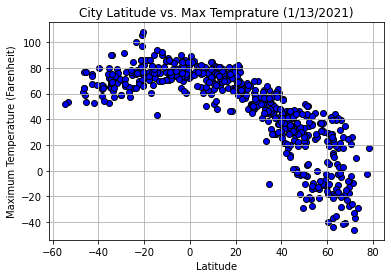

In [30]:
#Create Scatter Plot
plt.scatter(latitude, maximum_temperature, marker="o", facecolors="blue", edgecolors="black")


# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature (1/13/2021)")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
#Save 
plt.savefig('../output_data/Lat_Temp.png')
#Show
plt.show

In [31]:
#The further you move north of the equator, the lower the max temperature gets.
#According to the graph, you cannot say the same thing about moving south of the equator.

## Latitude vs. Humidity Plot

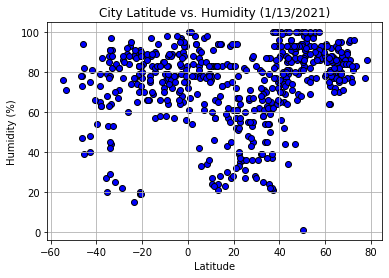

In [32]:
#Create Scatter Plot
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (1/13/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save
plt.savefig('../output_data/Lat_Hum.png')
#show
plt.show()

In [34]:
#The graph shows a somewhat even pattern of humidity north and south of the equator that we cannot draw any #definitive conclusions about.

## Latitude vs. Cloudiness Plot

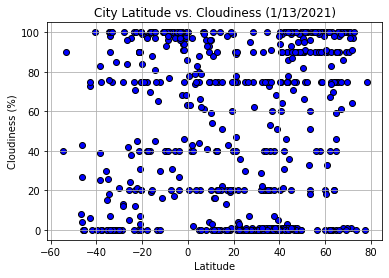

In [35]:
#Create Scatter Plot
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (1/13/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save
plt.savefig('../output_data/Lat_Cloud.png')
#show
plt.show()

In [36]:
#This graphs shows that regardless of where you are in the world, that clouds have a good chance of being there.

## Latitude vs. Wind Speed Plot

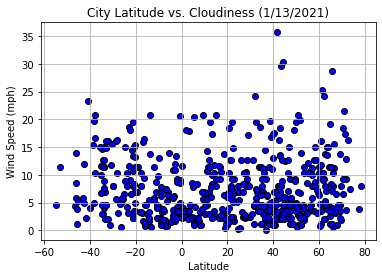

In [37]:
#Create Scatter Plot
plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (1/13/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#save
plt.savefig('../output_data/Lat_Wind.png')
#show
plt.show()

This graph shows that wind speed is evenly distributed, with just a few outliers both above and below the equator.

## Linear Regression

In [38]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_weather_df[city_weather_df['Lat']<1]
south_hem = city_weather_df[city_weather_df['Lat']>1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4265509790306656


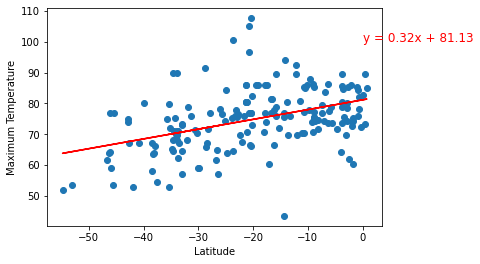

In [39]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/N_linear_Lat_Temp.png')
#Show
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8394338663851016


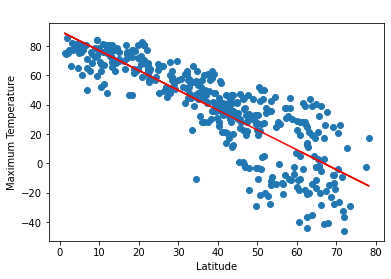

In [40]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/S_linear_Lat_Temp.png')
#Show
plt.show()

In [ ]:
 #Max Temperature Summary
 #The r values indicates that there is a correllation between latitude and maximum temperature in the southern     hemisphere, more so than in the northern hemisphere.
 #As the latitude gets higher in the southern hemisphere, the maximum temperature drops significantly

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25893495857723897


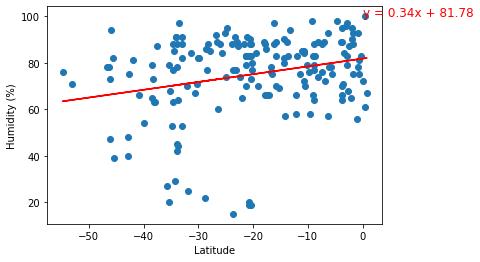

In [41]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/N_linear_Lat_Hum.png')
#Show
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/S_linear_Lat_Hum.png')
#Show
plt.show()

In [ ]:
 #Humidity Summary
 #The r values indicates that there is a high correllation between humidity and latitude in the southern         hemisphere, but not as much in the northern hemisphere.
 #In the Southern hemisphere, as the latitude gets higher, the humidity goes down significantly.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/N_linear_Lat_Cloud.png')
#Show
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/S_linear_Lat_Cloud.png')
#Show
plt.show()

In [ ]:
 #Cloudiness Summary
 #Only in the northern hmeisphere there is a slight correlation between latitude and cloudinsess, where there is   a higher % of cloudiness the closer you get towards the equator.
 #For the soutthern hemisphere, the low r value and only slightly tilted linear regression means there is very     little relationship between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/N_linear_Lat_Wind.png')
#Show
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
#Regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
#Save
plt.savefig('../output_data/S_linear_Lat_Wind.png')
#Show
plt.show()

In [ ]:
 #Wind Speed Summary
 #The low r values indicates that there is not a correllation between latitude and wind speed.
 #There is not a significant enough difference between hemispheres to draw any conclusions.